In [5]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100
from scipy.optimize import linprog

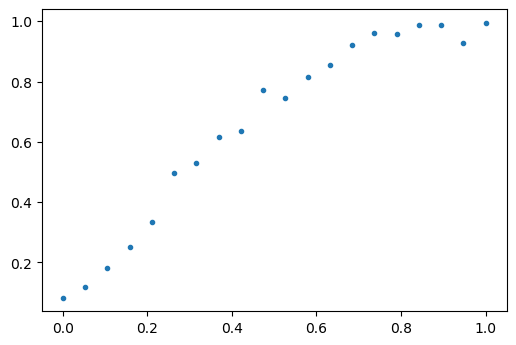

In [7]:
def minimize_l1_norm (x_arr, y_arr, left, right, y_ans):
    A = []
    A_equal = []
    b_equal = []
    b = []
    length = right - left + 1
    c = [0, 0] + [1] * length
    delta = x_arr[right] - x_arr[left] #aux
    for i in range(length):
        aux1 = [(x_arr[right] - x_arr[left + i]) / delta, (x_arr[left + i] - x_arr[left]) / delta]
        aux2 = [-(x_arr[right] - x_arr[left + i]) / delta, -(x_arr[left + i] - x_arr[left]) / delta]
        aux1 += [0] * length
        aux2 += [0] * length
        aux1[2 + i] = -1
        aux2[2 + i] = -1
        A.append(aux1)
        A.append(aux2)
        b.append(y_arr[left + i])
        b.append(-y_arr[left + i])
    if left > 0: #increase
        A.append([-1, 0] + [0] * length)
        b.append(-y_ans[left - 1])
    else: #(0, 0)
        A_equal.append([1, 0] + [0] * length)
        b_equal.append(0)
    if right == len(x_arr) - 1: #(1, 1)
        A_equal.append([0, 1] + [0] * length)
        b_equal.append(1)
    #print(A, b, c)
    A.append([1, -1] + [0] * length) #increase (y_l <= y_r)
    b.append(0)
    if A_equal != []:
        return linprog(c, A_ub=A, b_ub=b, A_eq=A_equal, b_eq=b_equal, bounds=(0, 1))
    else:
        return linprog(c, A_ub=A, b_ub=b, bounds=(0, 1))
    

N = 20
K = 30
x_range = np.linspace(0, 1, num=N)
#y_range = x_range ** 3 + np.random.sample(len(x_range)) / 10

y_range = [1.5 * x + np.random.random_sample()/10 for x in x_range if x < 1/3]
for i in range(len(x_range)):
    if x_range[i] >= 1/3 and x_range[i] < 2/3:
        y_range.append(1/2 + np.random.random_sample()/10)
for i in range(len(x_range)):
    if x_range[i] >= 2/3:
        y_range.append(1/2 + 1.5 * (x_range[i] - 2/3) + np.random.random_sample()/10)
        
        
y_range = np.sin(np.pi / 2 * x_range) + np.random.sample(len(x_range)) / 10
#y_range = abs(y_range)

#y_range = [np.abs(np.random.random_sample() / 10) for x in range(N)]

for i in range(len(y_range)):
    if y_range[i] > 1:
        y_range[i] = 2 - y_range[i]
        
        
        
# x_range = [0.0, .2,.2,.2,.4,.4,.4, 1.0]
# y_range = [0.0, .2,.3,.4,0,.1,.2, 1.1]


plt.plot(x_range, y_range, 'o', markersize=3)




#linear programming
# l = 3
# r = 5
# ans = minimize_l1_norm(x_range, y_range, l, r, [0] * N)
# y_l = ans.x[0]
# y_r = ans.x[1]
# plt.plot(x_range, y_l + (y_r - y_l) / (x_range[r] - x_range[l]) * (x_range - x_range[l]), 'o', markersize=2)
# print(y_l, y_r, ans.fun)

plt.show()

In [3]:


# y_ans = [0] * N
# if x_range[0] != 0:
#     y_ans[0] = y_range[0]
# y_ans_matrix = []
# y_ans_matrix.append(y_ans)
# for i in range(1, N):
#     y_ans_matrix.append([0] * N)

# dp = [N] * (len(x_range) + 1)
# dp[-1] = dp[0] = 0

# min_der = [np.inf] * (N + 1)
# min_der[0] = min_der[-1] = 0
# if y_range[0] != 0:
#     min_der[0] = y_range[0]

# for i in range(1, N):
#     for j in range(i): #left border of line
#         res = minimize_l1_norm(x_range, y_range, j, i, y_ans_matrix[j - 1])
#         if dp[j - 1] + res.fun == dp[i] and min_der[i] > max(min_der[j - 1], (res.x[1] - res.x[0])/(x_range[i] - x_range[j])):
#             min_der[i] = min(min_der[i], max(min_der[j - 1], (res.x[1] - res.x[0])/(x_range[i] - x_range[j])))
#             y_l = res.x[0]
#             y_r = res.x[1]
#             y_ans_matrix[i] = [y_ans_matrix[j - 1][x] for x in range(len(y_ans_matrix[0]))]
#             for k in range(j, i + 1):
#                 y_ans_matrix[i][k] = y_l + (y_r - y_l) / (x_range[i] - x_range[j]) * (x_range[k] - x_range[j])
#         if dp[j - 1] + res.fun < dp[i]:
#             min_der[i] = max(min_der[j - 1], (res.x[1] - res.x[0])/(x_range[i] - x_range[j]))
#             dp[i] = dp[j - 1] + res.fun
#             y_l = res.x[0]
#             y_r = res.x[1]
#             y_ans_matrix[i] = [y_ans_matrix[j - 1][x] for x in range(len(y_ans_matrix[0]))]
#             for k in range(j, i + 1):
#                 y_ans_matrix[i][k] = y_l + (y_r - y_l) / (x_range[i] - x_range[j]) * (x_range[k] - x_range[j])
# plt.plot(x_range, y_range, 'o', markersize=4)
# plt.plot(x_range, y_ans_matrix[-1], '--', markersize=2)

# plt.grid()
# plt.show()

out is [    3.43280963   -31.07326625   188.59075169  -539.81982831
   883.96718504 -1000.           403.93333036  1000.
  -670.33412124 -1000.          -371.95710204  1000.
  1000.           470.47848032 -1000.         -1000.
  -555.73539898  1000.          1000.          -780.48284022] fun is 0.3621611377293795
der before is 3.432809633073946
out is [   -5.54192568   -27.43888598   348.47785241 -1000.
   853.09611602    77.50409418   613.93475796 -1000.
 -1000.           254.64531348  1000.          1000.
    88.50225413 -1000.         -1000.          -391.46305394
  1000.          1000.          -813.03163558     2.31511299] fun is 2.3151129853870316
max der is 2.315112985387683


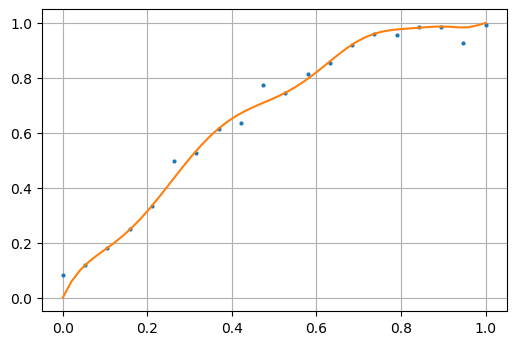

In [8]:

def minimize_poly (x_arr, y_arr, left, right, degree=5):
    A = []
    A_equal = []
    b_equal = []
    b = []
    length = right - left + 1
    c = [1] * length
    for j in range(degree):
        c.append(0)
    for ind in range(left, right + 1):
        #first length -- err, next degree -- coeffs
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[ind] ** (a + 1))
        aux[ind - left] = -1
        A.append(aux)
        b.append(y_range[ind])
        
        aux = [-x for x in aux]
        aux[ind - left] = -1
        A.append(aux)
        b.append(-y_range[ind])
        
        #derivative at each x_i
        aux = [0] * length
        for a in range(1, degree + 1):
            aux.append(-a * x_range[ind] ** (a - 1))
        A.append(aux)
        b.append(0)
        
        
    if left == 0:
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[left] ** (a + 1))
        A_equal.append(aux)
        b_equal.append(0)
    if right == len(x_range) - 1:
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[right] ** (a + 1))
        A_equal.append(aux)
        b_equal.append(1)
    if A_equal != []:   
        return linprog(c, A_ub=A, b_ub=b, A_eq=A_equal, b_eq=b_equal, bounds=(-1000, 1000), method='revised simplex')
    return linprog(c, A_ub=A, b_ub=b, bounds=(-1000, 1000))


def minimize_der(x_arr, y_arr, degree, opt_l1):
    A = []
    A_equal = []
    b_equal = []
    b = []
    length = len(x_range)
    for ind in range(length):
        #first length -- err, next degree -- coeffs, last one -- max of deriv
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[ind] ** (a + 1))
        aux[ind] = -1
        aux.append(0)
        A.append(aux)
        b.append(y_range[ind])
        
        aux = [-x for x in aux]
        aux[ind] = -1
        A.append(aux)
        b.append(-y_range[ind])
        
        #derivative at each x_i >= 0
        aux = [0] * length
        for a in range(1, degree + 1):
            aux.append(-a * x_range[ind] ** (a - 1))
        aux.append(0)
        A.append(aux)
        b.append(0)
        #derivative at each x_i <= last
        aux = [-x for x in aux]
        aux[-1] = -1
        A.append(aux)
        b.append(0)
    
    #right == len(x_range) - 1
    aux = [0] * length
    for a in range(degree):
        aux.append(x_range[len(x_range) - 1] ** (a + 1))
    aux.append(0)
    A_equal.append(aux)
    b_equal.append(1)
    
    #opt l1
    aux = [1] * length
    for i in range(degree + 1):
        aux.append(0)
    A.append(aux)
    b.append(opt_l1 + 0.01)
    
    c = [0] * (length + degree + 1)
    c[-1] = 1
    
    return linprog(c, A_ub=A, b_ub=b, A_eq=A_equal, b_eq=b_equal, bounds=(-1000, 1000), method='revised simplex')

def poly(x, params):
    acm = 0.0
    for j in range(len(params)):
        acm += (x ** int(j + 1)) * params[j]
    return acm

def poly_der(x, params):
    acm = 0.0
    for i in range(1, len(params) + 1):
        acm += params[i - 1] * i * (x ** (i - 1))
    return acm
        
        
DEGREE = N
plt.plot(x_range, y_range, 'o', markersize=2)

out = minimize_poly(x_range, y_range, 0, N - 1, degree=DEGREE)
print('out is', out.x[-DEGREE:], 'fun is', out.fun)
y_ans = [poly(x, out.x[-DEGREE:]) for x in np.linspace(0, 1)]
plt.plot(np.linspace(0, 1), y_ans)
#find max of deriv
print('der before is', max([poly_der(x, out.x[-DEGREE:]) for x in x_range]))



#min_der
out = minimize_der(x_range, y_range, DEGREE, out.fun)
print('out is', out.x[-DEGREE:], 'fun is', out.fun)
y_ans = [poly(x, out.x[-(DEGREE + 1):-1]) for x in np.linspace(0, 1)]
#plt.plot(np.linspace(0, 1), y_ans)
print('max der is', max([poly_der(x, out.x[-(DEGREE + 1):-1]) for x in x_range]))

# plt.legend()
plt.grid()
plt.savefig('minDer.png')
plt.show()

L_1-norm is 1.220922023317431
max der is 3.199999999999998


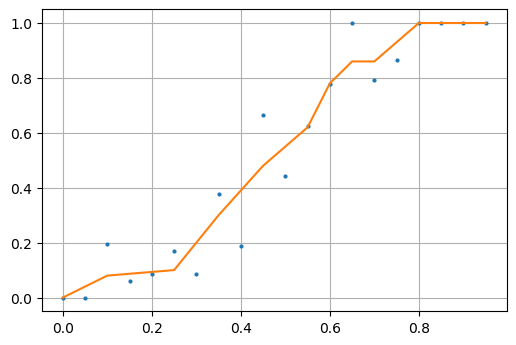

In [19]:
def getNorm(x_range, y_range, i, j, y_l, y_r): #get L_1 norm from [i, j]
    acm = 0.0
    if i == j:
        return np.abs(y_range[i] - y_r)
    for k in range(i, j + 1):
        acm += np.abs(y_l + (y_r - y_l)/(x_range[j] - x_range[i]) * (x_range[k] - x_range[i]) - y_range[k])
    return acm

K = 50
dp = [[np.inf] * (K + 1) for i in range(N)]
der = [[np.inf] * (K + 1) for i in range(N)]
p = [[-1] * (K + 1) for i in range(N)]
for i in range(K):
    der[0][i] = 0
dp[0][0] = y_range[0]
for i in range(1, N):
    for j in range(K + 1):
        for q in range(i): #left border of a line
            for k in range(j + 1):
                dp[i][j] = min(dp[i][j], dp[q][k] + getNorm(x_range, y_range, q + 1, i, k/K, j/K))
for i in range(1, N):
    for j in range(K + 1):
        for q in range(i): #left border of a line
            for k in range(j + 1):
                if dp[i][j] == dp[q][k] + getNorm(x_range, y_range, q + 1, i, k/K, j/K):
                    if max(der[q][k], (j - k)/(K * (x_range[i] - x_range[q]))) < der[i][j]:
                        der[i][j] = max(der[q][k], (j - k)/(K * (x_range[i] - x_range[q])))
                        p[i][j] = [q, k]
# print(dp[-1])
# print(der[-1])
# print(p[-1])

i = N - 1
j = K
x_ans = [] #indecies of x_range
y_ans = [] #y(x_ans)
while p[i][j] != -1:
    y_ans.append(j / K)
    x_ans.append(i)
    pair = p[i][j]
    i = pair[0]
    j = pair[1]
y_ans.append(j / K)
x_ans.append(i)

#reverse
x_ans = x_ans[::-1]
y_ans = y_ans[::-1]
#calculate L_1-norm

acm = np.abs(y_range[-1] - 1)
for i in range(1, len(x_ans)):
    acm += getNorm(x_range, y_range, x_ans[i - 1], x_ans[i], y_ans[i - 1], y_ans[i])
    acm -= np.abs(y_range[x_ans[i]] - y_ans[i])
print('L_1-norm is', acm)

acm = 0.0
for i in range(1, len(x_ans)):
    acm = max(acm, (y_ans[i] - y_ans[i - 1])/(x_range[x_ans[i]] - x_range[x_ans[i - 1]]))
print('max der is', acm)

plt.plot(x_range, y_range, 'o', markersize=2)
plt.plot([x_range[i] for i in x_ans], y_ans)

plt.grid()
plt.savefig('dynProg.png')
plt.show()